# Plotting

There are many libraries for plotting in Python. The standard library is [`matplotlib`](https://matplotlib.org/). Its [examples](https://matplotlib.org/examples/index.html) and [gallery](https://matplotlib.org/gallery.html) are particularly useful references.

Matplotlib is most useful if you have data in `numpy` arrays. We can then plot standard single graphs straightforwardly:

In [1]:
%matplotlib inline

The above command is only needed if you are plotting in a Jupyter notebook.

We now construct some data:

In [2]:
import numpy

x = numpy.linspace(0, 1)
y1 = numpy.sin(numpy.pi * x) + 0.1 * numpy.random.rand(50)
y2 = numpy.cos(3.0 * numpy.pi * x) + 0.2 * numpy.random.rand(50)

And then produce a line plot:

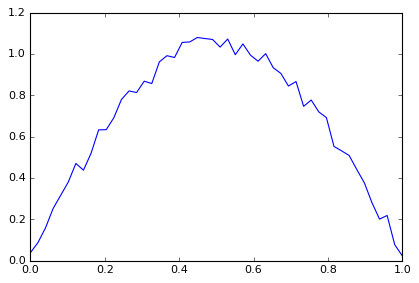

In [3]:
from matplotlib import pyplot
pyplot.plot(x, y1)
pyplot.show()

We can add labels and titles:

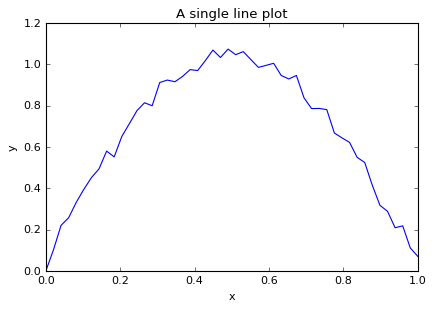

In [8]:
pyplot.plot(x, y1)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.title('A single line plot')
pyplot.show()

We can change the plotting style, and use LaTeX style notation where needed:

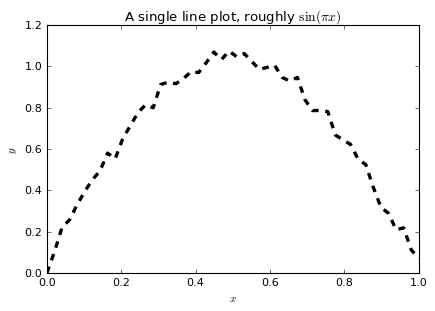

In [9]:
pyplot.plot(x, y1, linestyle='--', color='black', linewidth=3)
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$y$')
pyplot.title(r'A single line plot, roughly $\sin(\pi x)$')
pyplot.show()

We can plot two lines at once, and add a legend, which we can position:

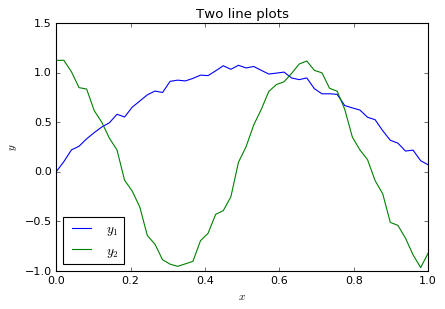

In [10]:
pyplot.plot(x, y1, label=r'$y_1$')
pyplot.plot(x, y2, label=r'$y_2$')
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$y$')
pyplot.title('Two line plots')
pyplot.legend(loc='lower left')
pyplot.show()

We would probably prefer to use subplots. At this point we have to leave the simple interface, and start building the plot using its individual components, `figures` and `axes`, which are objects to manipulate:

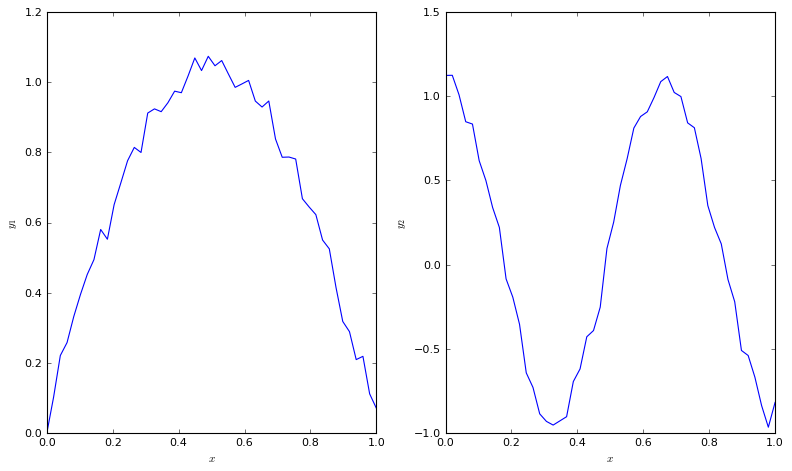

In [11]:
fig, axes = pyplot.subplots(nrows=1, ncols=2, figsize=(10,6))
axis1 = axes[0]
axis1.plot(x, y1)
axis1.set_xlabel(r'$x$')
axis1.set_ylabel(r'$y_1$')
axis2 = axes[1]
axis2.plot(x, y2)
axis2.set_xlabel(r'$x$')
axis2.set_ylabel(r'$y_2$')
fig.tight_layout()
pyplot.show()

The `axes` variable contains all of the separate axes that you may want. This makes it easy to construct many subplots using a loop:

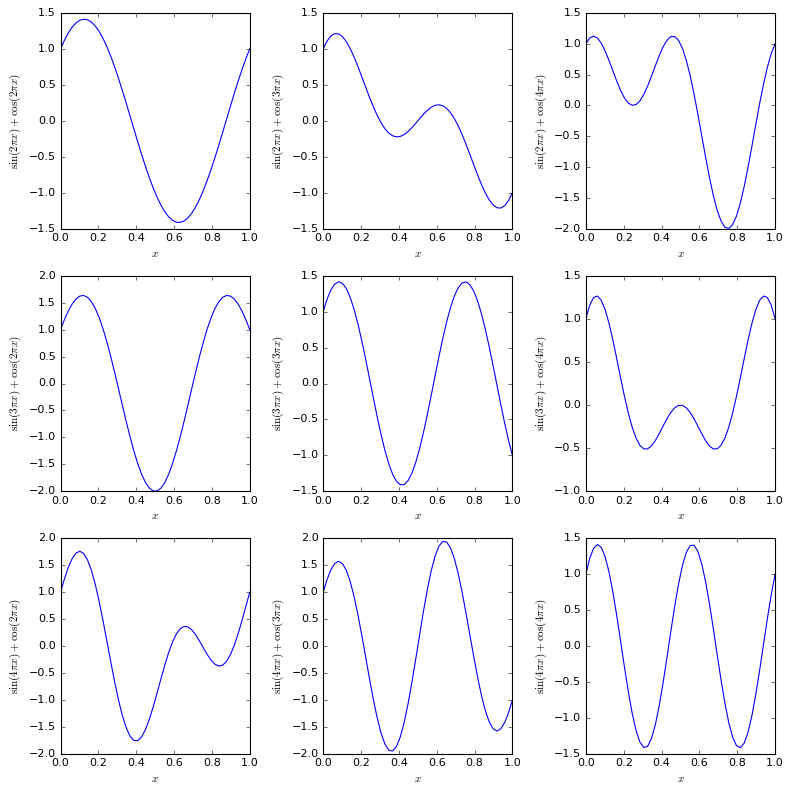

In [12]:
data = []
for nx in range(2,5):
    for ny in range(2,5):
        data.append(numpy.sin(nx * numpy.pi * x) + numpy.cos(ny * numpy.pi * x))

fig, axes = pyplot.subplots(nrows=3, ncols=3, figsize=(10,10))
for nrow in range(3):
    for ncol in range(3):
        ndata = ncol + 3 * nrow
        axes[nrow, ncol].plot(x, data[ndata])
        axes[nrow, ncol].set_xlabel(r'$x$')
        axes[nrow, ncol].set_ylabel(r'$\sin({} \pi x) + \cos({} \pi x)$'.format(nrow+2, ncol+2))
fig.tight_layout()
pyplot.show()

Matplotlib will allow you to generate and place axes pretty much wherever you like, to use logarithmic scales, to do different types of plot, and so on. Check the [examples](https://matplotlib.org/examples/index.html) and [gallery](https://matplotlib.org/gallery.html) for details.

# Data sets

If the information is not in `numpy` arrays but in a spreadsheet-like format, Matplotlib may not be the best approach.

For handling large data sets, the standard Python library is [`pandas`](http://pandas.pydata.org/). It keeps the data in a *dataframe* which keeps the rectangular data together with its labels.

Let's load the standard [Iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set), which we can get [from GitHub](https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv), in:

In [4]:
import pandas

In [35]:
iris = pandas.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv')

In [40]:
# print first 5 records
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Note that `pandas` can read Excel files (using `pandas.read_excel`), and takes as arguments either the URL (as here) or the filename on the local machine.

Once we have the data, `<dataframe>.plot` gives us lots of options to plot the result. Let's plot a histogram of the Petal Length:

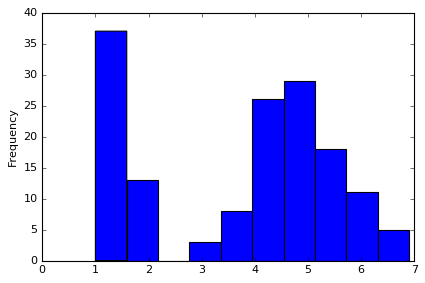

In [16]:
iris['PetalLength'].plot.hist()
pyplot.show()

We can see the underlying library is Matplotlib, but it's far easier to plot large data sets.

We can get some basic statistics for our data using `describe()`:

In [18]:
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can also extract specific metrics:

In [29]:
print(iris['SepalLength'].min())
print(iris['PetalLength'].std())
print(iris['PetalWidth'].count())

4.3
1.7644204199522617
150


However, we often wish to calculate statistics for a subset of our data. For this, we can use pandas' *groups*. Let's group our data by `Name` and try running `describe` again. We see that pandas has now calculated statistics for each type of iris separately.

In [24]:
grouped_iris = iris.groupby('Name')
grouped_iris.describe()

PetalLength  PetalWidth  SepalLength  SepalWidth
Name                                                                   
Iris-setosa     count    50.000000   50.000000    50.000000   50.000000
                mean      1.464000    0.244000     5.006000    3.418000
                std       0.173511    0.107210     0.352490    0.381024
                min       1.000000    0.100000     4.300000    2.300000
                25%       1.400000    0.200000     4.800000    3.125000
                50%       1.500000    0.200000     5.000000    3.400000
                75%       1.575000    0.300000     5.200000    3.675000
                max       1.900000    0.600000     5.800000    4.400000
Iris-versicolor count    50.000000   50.000000    50.000000   50.000000
                mean      4.260000    1.326000     5.936000    2.770000
                std       0.469911    0.197753     0.516171    0.313798
                min       3.000000    1.000000     4.900000    2.000000
                25%       4.000000    1.200000     5.600000    2.525000
                50%       4.350000    1.300000     5.900000    2.800000
                75%       4.600000    1.500000     6.300000    3.000000
                max       5.100000    1.800000     7.000000    3.400000
Iris-virginica  count    50.000000   50.000000    50.000000   50.000000
                mean      5.552000    2.026000     6.588000    2.974000
                std       0.551895    0.274650     0.635880    0.322497
                min       4.500000    1.400000     4.900000    2.200000
                25%       5.100000    1.800000     6.225000    2.800000
                50%       5.550000    2.000000     6.500000    3.000000
                75%       5.875000    2.300000     6.900000    3.175000
                max       6.900000    2.500000     7.900000    3.800000

In [33]:
grouped_iris['PetalLength'].mean()

Name
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: PetalLength, dtype: float64

We can select subsets of our data using criteria. For example, we can select all records with `PetalLength` greater than 5:

In [36]:
iris[iris.PetalLength > 5].head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
83,6.0,2.7,5.1,1.6,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica


We can also combine criteria like so:

In [39]:
iris[(iris.Name == 'Iris-setosa') & (iris.PetalWidth < 0.3)].head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Now let's look at a slightly more complex example where the data is spread across multiple files and contains many different fields of different datatypes.

Spotify provide a [web API](https://developer.spotify.com/web-api/) which can be used to download data about its music. This data includes the [*audio features*](https://developer.spotify.com/web-api/object-model/#audio-features-object) of a track, a set of measures including 'acousticness', 'danceability', 'speechiness' and 'valence':
>A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

We can download this data using a library such as [spotipy](http://spotipy.readthedocs.io). In the folder `spotify_data`, you shall find a few `.csv` files containing data downloaded for tracks from playlists of several different musical genres. 

Let's begin by importing our data.

In [5]:
dfs = {'indie': pandas.read_csv('spotify_data/indie.csv'), 'pop': pandas.read_csv('spotify_data/pop.csv'), 
       'country': pandas.read_csv('spotify_data/country.csv'), 'metal': pandas.read_csv('spotify_data/metal.csv'), 
       'house': pandas.read_csv('spotify_data/house.csv'), 'rap': pandas.read_csv('spotify_data/rap.csv')}

To compare the data from these different datasets, it will help if we first combine them into a single dataframe. Before we do this, we'll add an extra field to each of our dataframes describing the musical genre so that we do not lose this information when the dataframes are combined. 

In [6]:
# add genre field to each dataframe
for name, df in dfs.items():
    df['genre'] = name

# combine into single dataframe
data = pandas.concat(dfs.values())
data

,Unnamed: 0,album,artists,duration_ms,explicit,href,id,name,popularity,preview_url,...,loudness,mode,speechiness,tempo,time_signature,track_href,type.1,uri.1,valence,genre
0,1,All Your Fault: Pt. 1,"Bebe Rexha, Ty Dolla $ign",197253,True,https://api.spotify.com/v1/tracks/4ZJPwET9Jrgp...,4ZJPwET9Jrgpkqi4Vo3Yg8,Bad Bitch (feat. Ty Dolla $ign),85,https://p.scdn.co/mp3-preview/9284a8a94b8c16ef...,...,-6.252,1,0.0539,139.910,4,https://api.spotify.com/v1/tracks/4ZJPwET9Jrgp...,audio_features,spotify:track:4ZJPwET9Jrgpkqi4Vo3Yg8,0.364,pop
1,2,Good Life (with G-Eazy & Kehlani),"G-Eazy, Kehlani",225525,False,https://api.spotify.com/v1/tracks/1Eck97uRMlpr...,1Eck97uRMlprKOOJN9oO1E,Good Life (with G-Eazy & Kehlani),83,https://p.scdn.co/mp3-preview/88d8d456dcf9b55e...,...,-5.220,1,0.2120,168.385,4,https://api.spotify.com/v1/tracks/1Eck97uRMlpr...,audio_features,spotify:track:1Eck97uRMlprKOOJN9oO1E,0.551,pop
2,3,13 Reasons Why (A Netflix Original Series Soun...,Lord Huron,206933,False,https://api.spotify.com/v1/tracks/3FsBtu3gdlfZ...,3FsBtu3gdlfZjBLXyDvmj1,The Night We Met,32,NaN,...,-9.560,1,0.0378,87.024,3,https://api.spotify.com/v1/tracks/3FsBtu3gdlfZ...,audio_features,spotify:track:3FsBtu3gdlfZjBLXyDvmj1,0.117,pop
3,4,Obsession (feat. Jon Bellion),"Vice, Jon Bellion",221982,False,https://api.spotify.com/v1/tracks/542Xd5qDeLBv...,542Xd5qDeLBvgXZXhfW7LE,Obsession (feat. Jon Bellion),84,https://p.scdn.co/mp3-preview/16ab1dd04110aa3f...,...,-7.775,1,0.0300,101.999,4,https://api.spotify.com/v1/tracks/542Xd5qDeLBv...,audio_features,spotify:track:542Xd5qDeLBvgXZXhfW7LE,0.441,pop
4,5,Slow Hands,Niall Horan,188174,False,https://api.spotify.com/v1/tracks/27vTihlWXiz9...,27vTihlWXiz9f9lJM3XGVU,Slow Hands,83,NaN,...,-6.623,1,0.0519,85.899,4,https://api.spotify.com/v1/tracks/27vTihlWXiz9...,audio_features,spotify:track:27vTihlWXiz9f9lJM3XGVU,0.874,pop
5,6,So Good,"Clean Bandit, Zara Larsson",214866,False,https://api.spotify.com/v1/tracks/4SPLWgCPoKwU...,4SPLWgCPoKwULz2UTM8TKg,Symphony,41,NaN,...,-4.699,0,0.0429,122.948,4,https://api.spotify.com/v1/tracks/4SPLWgCPoKwU...,audio_features,spotify:track:4SPLWgCPoKwULz2UTM8TKg,0.470,pop
6,7,Memories...Do Not Open,The Chainsmokers,207520,True,https://api.spotify.com/v1/tracks/6cPyTS0Kk2sc...,6cPyTS0Kk2sc4xQwC93kOg,Break Up Every Night,84,https://p.scdn.co/mp3-preview/119d2078bf607422...,...,-5.957,1,0.0437,149.999,4,https://api.spotify.com/v1/tracks/6cPyTS0Kk2sc...,audio_features,spotify:track:6cPyTS0Kk2sc4xQwC93kOg,0.536,pop
7,8,I'm the One,"DJ Khaled, Justin Bieber, Quavo, Chance The Ra...",288876,True,https://api.spotify.com/v1/tracks/72Q0FQQo32KJ...,72Q0FQQo32KJloivv5xge2,I'm the One,100,https://p.scdn.co/mp3-preview/f6fdecfbaae1ed54...,...,-4.267,1,0.0367,80.984,4,https://api.spotify.com/v1/tracks/72Q0FQQo32KJ...,audio_features,spotify:track:72Q0FQQo32KJloivv5xge2,0.811,pop
8,9,Attention,Charlie Puth,211475,False,https://api.spotify.com/v1/tracks/4iLqG9SeJSnt...,4iLqG9SeJSnt0cSPICSjxv,Attention,94,https://p.scdn.co/mp3-preview/e20bdb50a10a7c5a...,...,-4.432,0,0.0432,100.041,4,https://api.spotify.com/v1/tracks/4iLqG9SeJSnt...,audio_features,spotify:track:4iLqG9SeJSnt0cSPICSjxv,0.758,pop
9,10,The Cure,Lady Gaga,211363,False,https://api.spotify.com/v1/tracks/51PIvodunv6N...,51PIvodunv6NmX5250zxAh,The Cure,88,NaN,...,-4.842,1,0.0356,99.977,4,https://api.spotify.com/v1/tracks/51PIvodunv6N...,audio_features,spotify:track:51PIvodunv6NmX5250zxAh,0.539,pop


This has given us a fairly sizeable dataframe with 513 rows and 32 columns. However, if you look closely at the index column you'll notice something dodgey has happened - combining our dataframes has meant that the index field is no longer unique (multiple records share the same index).

In [59]:
data.index.is_unique

False

This is not good. Looking at the printout of the dataframe above, we see that the last record is *LOYALTY.* by Kendrick Lamar and has index 46. However, if we try to access the record with index 46, we instead get *Rebellion (Lies)* by Arcade Fire. 

In [60]:
data.iloc[46]

Unnamed: 0                                                         48
album                                                         Funeral
artists                                                   Arcade Fire
duration_ms                                                    310893
explicit                                                        False
href                https://api.spotify.com/v1/tracks/5qk1xXcERl8R...
id                                             5qk1xXcERl8RW645ztqDAW
name                                                 Rebellion (Lies)
popularity                                                         58
preview_url         https://p.scdn.co/mp3-preview/f891f8274794a442...
track_number                                                        9
type                                                            track
uri                              spotify:track:5qk1xXcERl8RW645ztqDAW
acousticness                                                   0.0068
analysis_url        

We can remedy this by *reindexing*. Looking at the fields available, it looks like the tracks' `id` would be a good choice for a unique index. 

In [61]:
data.set_index('id', inplace=True)

In [62]:
data.index.is_unique

False

Unfortunately, there are still duplicates where the same track appears in multiple playlists. Let's remove these duplicates, keeping only the first instance.

In [68]:
data = data[~data.index.duplicated(keep='first')]
data.index.is_unique

True

Sucess! Before we do anything else, let's write our single combined dataset to file.

In [127]:
data.to_csv('spotify_data/combined_data.csv')

Now onto some analysis. Let's first look at some statistics for each of our genres.

In [72]:
data[['duration_ms', 'explicit', 'popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 
     'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'genre']].groupby('genre').mean()

,duration_ms,explicit,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
genre,,,,,,,,,,,,
country,222361.300000,0.020000,52.260000,0.123496,0.575860,0.755760,0.004834,0.185076,-5.356140,0.041214,125.422320,0.563620
house,413951.619565,0.010870,32.184783,0.071019,0.764717,0.672033,0.741966,0.122800,-10.278283,0.059933,120.842522,0.374475
indie,237722.958333,0.031250,56.583333,0.189482,0.598167,0.693562,0.147994,0.185283,-6.631104,0.045101,122.083937,0.542333
metal,264057.406780,0.084746,30.694915,0.001797,0.420085,0.946678,0.022654,0.229066,-4.277203,0.103297,131.340254,0.358563
pop,214640.508982,0.185629,67.131737,0.170122,0.658557,0.658542,0.017714,0.156259,-6.187772,0.083049,115.435132,0.466786
rap,214801.739130,0.978261,76.695652,0.147325,0.785978,0.595761,0.000365,0.142937,-7.173261,0.213624,135.210065,0.419304


From this alone we can get a lot of information: house tracks are on average almost twice as long as tracks from the other genres, over 97% of rap tracks contain explicit lyrics, metal tracks are the most energetic but tend to be sadder (lower valence) than country or indie. Let's try sorting our data to find the saddest tracks in each genre.

We do this by sorting the data by valence (`sort_values('valence')`), grouping by genre (`groupby('genre')`) then by taking the first value of each group (`head(1)`).

In [123]:
data.sort_values('valence')[['album', 'artists', 'name', 'genre', 'valence']].groupby('genre').head(1)

,album,artists,name,genre,valence
id,,,,,
4R1AbCs2wEu4e6j7FB7sRZ,The Touch,Rampa,The Touch,house,0.0354
2yoCtR2C0sMFgII70RosuY,The Raven Age,The Raven Age,Angel In Disgrace,metal,0.0634
2Ce5IyMlVRVvN997ZJjJJA,HNDRXX,"Future, Rihanna",Selfish,pop,0.0951
05nbZ1xxVNwUTcGwLbp7CN,NAV,NAV,Myself,rap,0.1000
1gk3FhAV07q9Jg77UxnVjX,ZABA,Glass Animals,Gooey,indie,0.1070
0xwPzLmBAYro8BUz7MrtAo,Montevallo,Sam Hunt,Make You Miss Me,country,0.1670


We can visualise our data by plotting the various characteristics against each other. In the plot below, we compare the energy and danceability of country, metal and house music. The data from the three different genres separates into three pretty distinct clusters.

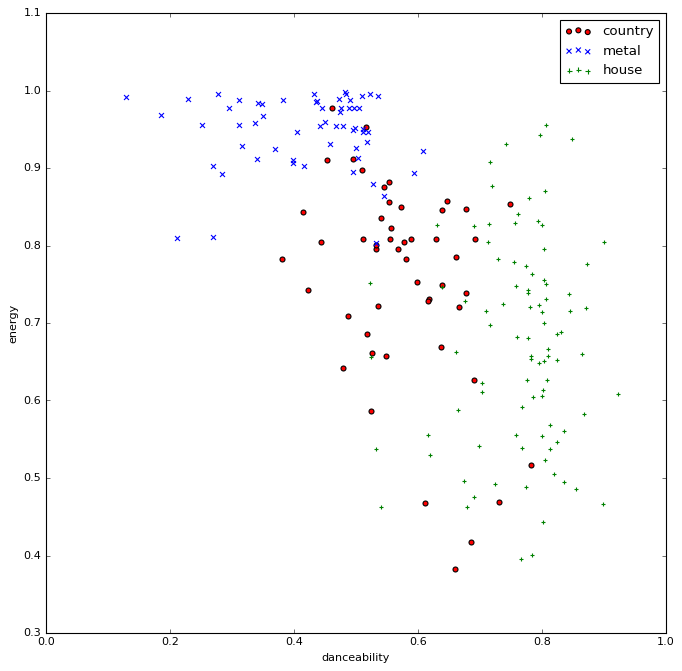

In [111]:
colours = ['red', 'blue', 'green', 'orange', 'pink', 'purple']

ax = data[data.genre == 'country'].plot.scatter('danceability', 'energy', c=colours[0], label='country', figsize=(10,10))
data[data.genre == 'metal'].plot.scatter('danceability', 'energy', c=colours[1], marker='x', label='metal', ax=ax)
data[data.genre == 'house'].plot.scatter('danceability', 'energy', c=colours[2], marker='+', label='house', ax=ax)

More information about `pandas` can be found in [the documentation](http://pandas.pydata.org/pandas-docs/stable/), or [in tutorials](https://github.com/fonnesbeck/ngcm_pandas_2017) or in [standard books](https://www.amazon.co.uk/Python-Data-Analysis-Wrangling-IPython/dp/1449319793).

##### Exercises

1. Create a histogram of the SepalWidth for each of the species groups in the iris dataset
2. Plot acousticness against liveness for the music dataset. Use a for loop to add the different datasets to the plot (i.e. rather than typing each out by hand, as done above).

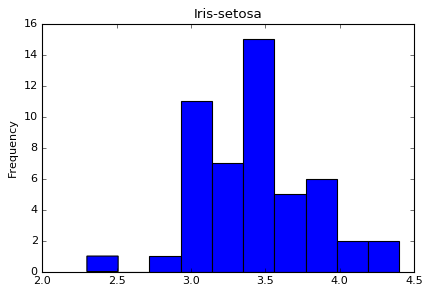

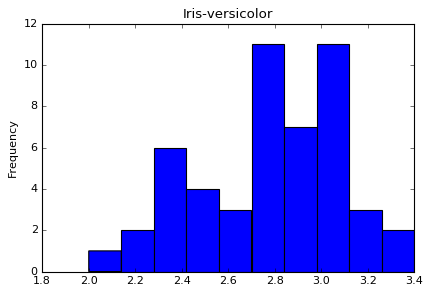

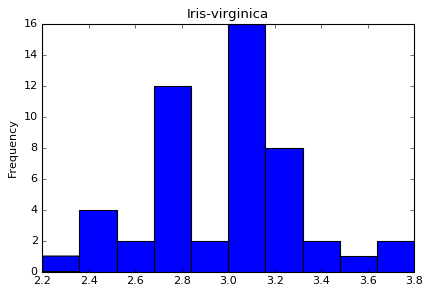

In [39]:
for name, df in iris.groupby('Name'):
    # create a new figure
    pyplot.figure()
    # plot histogram of sepalwidth
    df['SepalWidth'].plot.hist()
    # add title
    pyplot.title(name)

In the solution below for the music genre exercise, we've included a few extra steps in order to format the plot and make it more readable (e.g. changing the axis limits, increasing the figure size and fontsize).

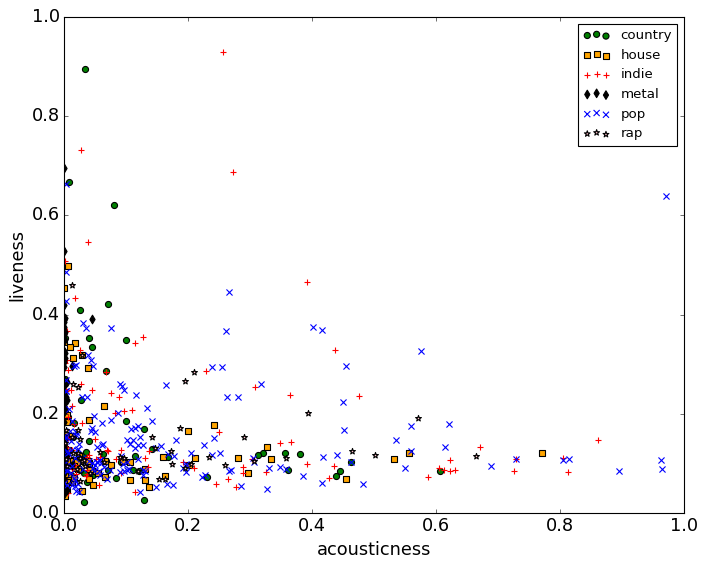

In [33]:
# create a new axis
fig, axis = pyplot.subplots()

# create a dictionary of colours
colours = {'indie': 'red', 'pop': 'blue', 
           'country': 'green', 'metal': 'black', 
           'house': 'orange', 'rap': 'pink'}
# create a dictionary of markers 
markers = {'indie': '+', 'pop': 'x', 
           'country': 'o', 'metal': 'd', 
           'house': 's', 'rap': '*'}

for name, df in data.groupby('genre'):
    df.plot.scatter('acousticness', 'liveness', label=name, s=30, color=colours[name], marker=markers[name],
                    ax=axis, figsize=(10,8), fontsize=16)

# set limits of x and y axes so that they are between 0 and 1
axis.set_xlim([0,1.0])
axis.set_ylim([0,1.0])

# set the font size of the axis labels
axis.xaxis.label.set_fontsize(16)
axis.yaxis.label.set_fontsize(16)
pyplot.show()

# Other libraries

There are many other options depending on what you need to display. If you have large data and want to more easily make nice plots, try [`seaborn`](http://seaborn.pydata.org/index.html) or [`altair`](https://altair-viz.github.io/). If you want to make the data interactive, especially online, try [`plotly`](https://plot.ly/) or [`bokeh`](http://bokeh.pydata.org/en/latest/). For a detailed discussion of plotting in Python in 2017, see [this talk by Jake Vanderplas](https://youtu.be/FytuB8nFHPQ).